<a href="https://colab.research.google.com/github/mahadrana054/Anime-Recommendation-Project/blob/master/Anime_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.** **Loading** **Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
anime = pd.read_csv('/content/anime (1).csv')
ratings = pd.read_csv('/content/rating.csv')

In [ ]:
ratings.sample(2)

,user_id,anime_id,rating
7677,93,3561.0,7.0
27045,308,4382.0,9.0


In [ ]:
anime.sample(2)

,anime_id,name,genre,type,episodes,rating,members
9906,7526,Ousama no Shippo,Fantasy,Movie,1,5.64,107
1083,11013,Inu x Boku SS,"Comedy, Romance, Shounen, Supernatural",TV,12,7.69,216204


# **2.** **Exploring** **Data**

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550461 entries, 0 to 550460
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   550461 non-null  int64
 1   anime_id  550461 non-null  int64
 2   rating    550461 non-null  int64
dtypes: int64(3)
memory usage: 12.6 MB


In [ ]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
ratings.describe()

,user_id,anime_id,rating
count,550461.000000,550461.000000,550461.000000
mean,2813.763642,10353.945344,6.145976
std,1614.598326,9228.510593,3.738109
min,1.000000,1.000000,-1.000000
25%,1386.000000,1818.000000,6.000000
50%,2851.000000,8532.000000,7.000000
75%,4247.000000,16592.000000,9.000000
max,5487.000000,34325.000000,10.000000


# **3.** **Missing** **Values**

In [ ]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [ ]:
ratings.isnull().sum()

,0
user_id,0
anime_id,0
rating,0


In [ ]:
print(ratings['anime_id'].nunique())
print(ratings['user_id'].nunique())

11200
73515


# **4. Clean and Fix data issues**

In [ ]:
anime['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [ ]:
anime['episodes'] =   anime['episodes'].replace('Unknown',np.nan).astype(float)

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  11954 non-null  float64
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 672.5+ KB


In [ ]:
ratings['new_rating'] = ratings['rating'].replace(-1, np.nan)

In [ ]:
from sklearn.impute import MissingIndicator
is_missing = MissingIndicator(features='all')
ratings['does_rating'] =  is_missing.fit_transform(ratings[['new_rating']]).astype(int)

In [ ]:
ratings_cleaned = ratings[ratings['rating'] != -1]
print(len(ratings_cleaned))
print(len(ratings))

6337241
7813737


# **5. Visualization**

**(i) Anime Rating Distribution**

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.histplot(anime['rating'], bins=30, kde=True)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Anime Ratings")
plt.show()

**(ii) Anime Types**

In [ ]:
sns.countplot(
    x='type',
    data=anime,
    palette='Set2'
)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Count by Group")
plt.show()

**(iii) Top Genres**

In [ ]:
from collections import Counter
genre_count = Counter()
for genres in anime['genre'].dropna():
  for g in genres.split(','):
    genre_count[g] += 1
genre_df = pd.DataFrame(genre_count.items(), columns = ['genre','count'])
genre_df = genre_df.sort_values(by='count' ,ascending=False)

sns.barplot(data=genre_df.head(10), x='count', y='genre', palette='viridis')
plt.title('Top 10 Common Animes Genres')
plt.xlabel('Count')
plt.xlabel('Count')
plt.show()

**(iv) Top 20 Anime with most members**

In [ ]:
top_anime = anime[['name', 'members']].sort_values(by = 'members', ascending=False).head(20)

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(data=top_anime, x='members', y='name',palette='rocket')
plt.title('Top 20 with most members')
plt.xlabel('Members')
plt.xlabel('Animes')
plt.show()

**(v) Average Anime rating VS Average User rating**

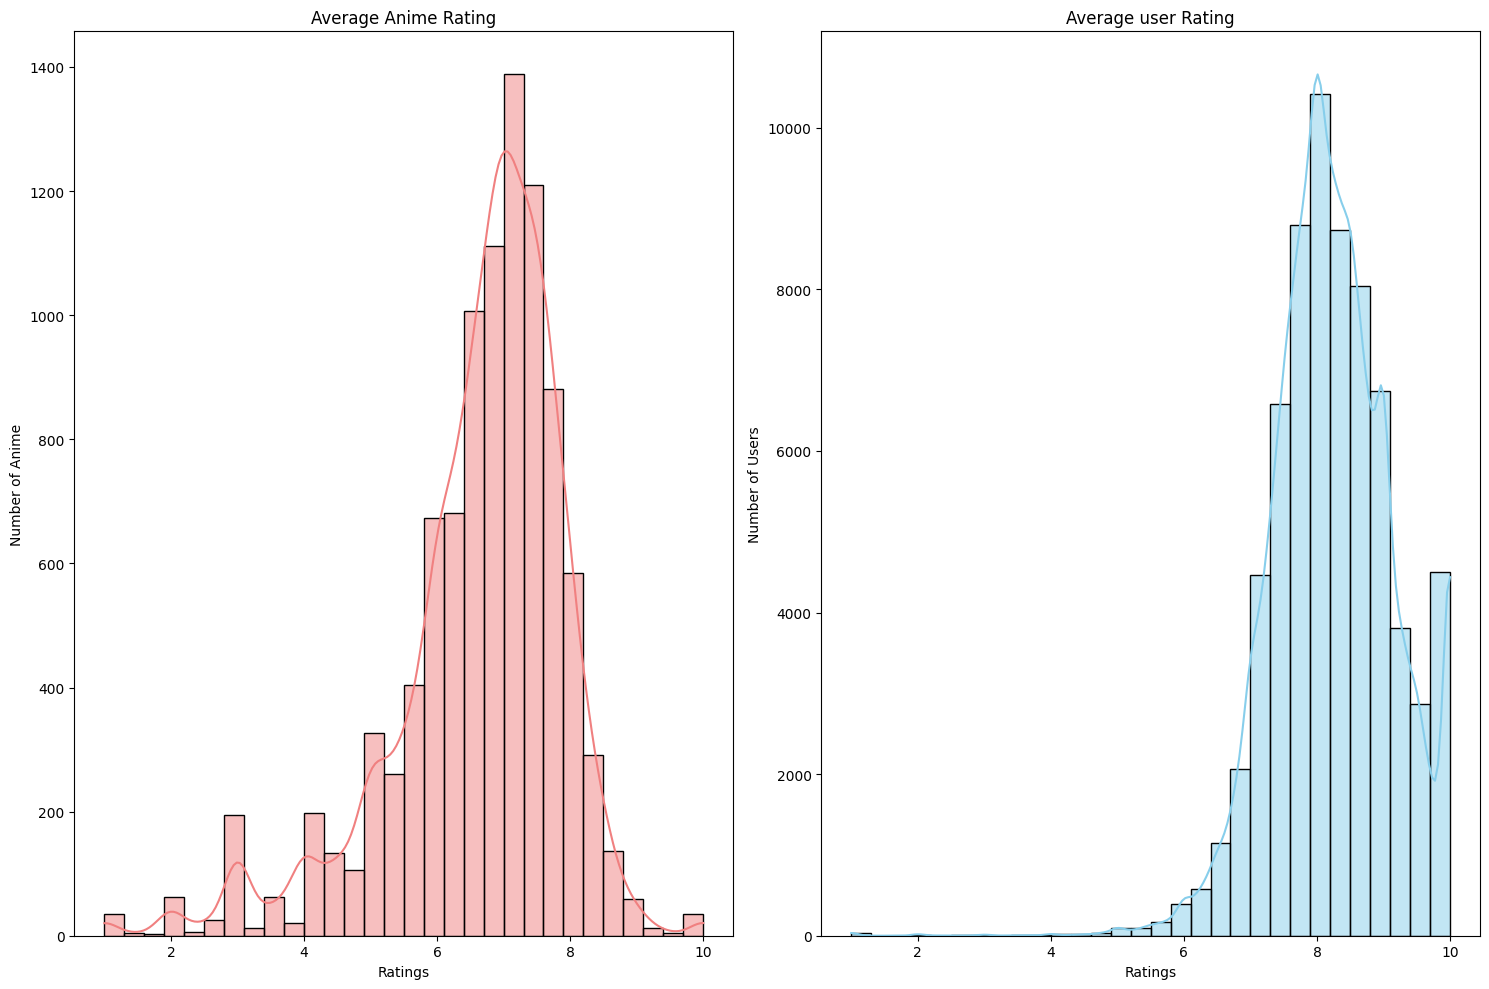

In [ ]:
avg_anime_rating = ratings_cleaned.groupby('anime_id')['rating'].mean()
avg_user_rating = ratings_cleaned.groupby('user_id')['rating'].mean()
fig, ax = plt.subplots(1, 2, figsize=(15,10))
sns.histplot(avg_anime_rating, color='lightcoral', edgecolor='black', bins=30, kde=True, ax=ax[0])
ax[0].set_title('Average Anime Rating')
ax[0].set_xlabel('Ratings')
ax[0].set_ylabel('Number of Anime')
sns.histplot(avg_user_rating, color='skyblue', edgecolor='black', bins=30, kde=True, ax=ax[1])
ax[1].set_title('Average user Rating')
ax[1].set_xlabel('Ratings')
ax[1].set_ylabel('Number of Users')
plt.tight_layout()
plt.show()

**(vi) Top Rated Animes**

/tmp/ipython-input-3077320134.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated_anime, y='name', x='num_ratings', palette='crest')


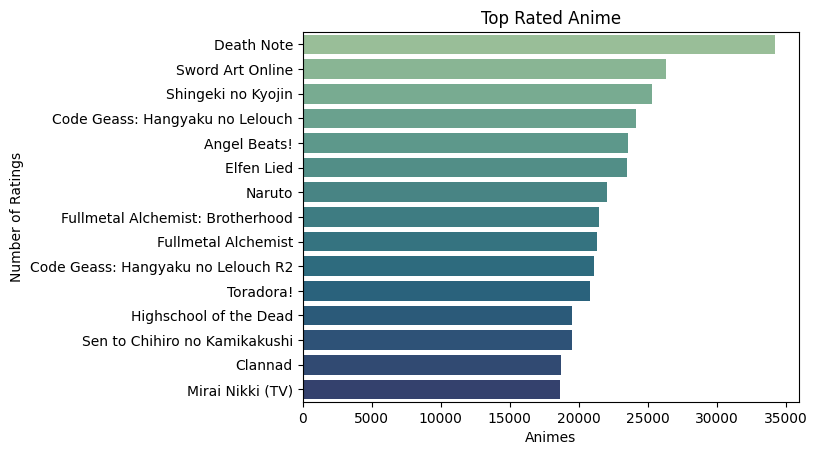

In [ ]:
anime_rating_counts = ratings_cleaned['anime_id'].value_counts().reset_index()
anime_rating_counts.columns = ['anime_id','num_ratings']
top_rated_anime = pd.merge(anime_rating_counts,  anime[['anime_id','name']], on='anime_id')
top_rated_anime = top_rated_anime.drop(columns=['anime_id'])
top_rated_anime = top_rated_anime.head(15)
sns.barplot(data=top_rated_anime, y='name', x='num_ratings', palette='crest')
plt.title('Top Rated Anime')
plt.xlabel('Animes')
plt.ylabel('Number of Ratings')
plt.show()

**(vii) WordCloud of Genres**

In [ ]:
from wordcloud import WordCloud
genre_data = anime['genre'].dropna()
all_genre = ','.join(genre_data)
genre_words = ' '.join(all_genre.replace(',', ' ').split())
wordcloud = WordCloud(
    height=400, width=800,
    background_color='white',
    colormap='plasma'
).generate(genre_words)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Anime Genre Word Cloud',fontsize=18)
plt.show()

**(viii) Rating Distribution by Type**

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(data=anime, x='type', y='rating', palette='pastel')
plt.title('Anime Rating by Type')
plt.xlabel('Anime Types')
plt.ylabel('Anime Ratings')
plt.xticks(rotation=45)
plt.show()

# 6. Anime Recommendation System

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

anime['genre'] = anime['genre'].fillna('')

tfidf = TfidfVectorizer(stop_words= 'english')
tfidf_matrix = tfidf.fit_transform(anime['genre'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

anime_indices = pd.Series(anime.index, index = anime['name']).drop_duplicates()

def recommendation(title, top_n=10):
  idx = anime_indices.get(title)
  if idx is None:
    print('Anime not found!')
    return
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x : x[1], reverse=True)[1:top_n + 1]
  anime_indices_top = [i[0] for i in sim_scores]
  return anime['name'].iloc[anime_indices_top]

In [ ]:
recommendation('Tokyo Ghoul')

,name
1518,Tokyo Ghoul √A
1268,Tokyo Ghoul: &quot;Pinto&quot;
3806,Night Head Genesis
760,Elfen Lied
436,Jigoku Shoujo Futakomori
870,Jigoku Shoujo
2170,Umineko no Naku Koro ni
388,Ajin 2nd Season
774,Ajin Part 1: Shoudou
882,Ajin
